In [10]:
from simulation import *

Generating mGraph
----- DONE
Getting layout


----- DONE
Setting default attributes
----- DONE
Choosing the source
----- DONE
Choosing the monitoring nodes
----- DONE
Mlist :  [6, 215, 59, 386, 205, 479, 270, 443, 129, 297, 395, 40, 98, 321, 448, 419, 445, 436, 482, 21, 67, 334, 432, 486, 73, 92, 318, 99, 161, 136, 52, 334, 79, 274, 386, 137, 231, 14, 147, 137, 49, 274, 409, 62, 163, 203, 312, 222, 250, 278] 
Slist :  [174]


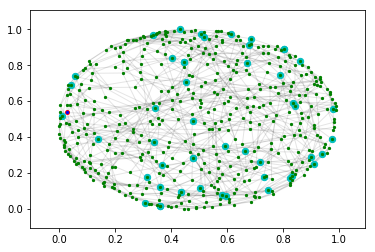

In [19]:
figureList = list()
# Parameters definition
numRumors = 1
maxThreshold = 1
numMonitors = 5
propagProba = 1
numNodes = 500
linkProba = 0.2
monitorTrigger = list()
numStep = 100



Graph, Pos, rumorSources, monitorsList = generateGraphReady(numNodes,linkProba,maxThreshold,numRumors,numMonitors)

fig1 =  drawColoredGraph(Graph, Pos, numRumors, rumorSources, monitorsList)

figureList.append(fig1)

Starting infection


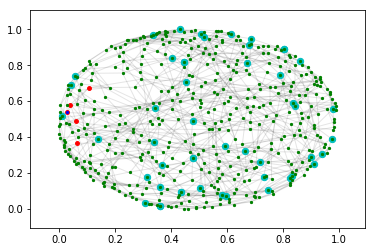

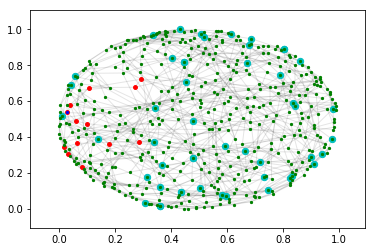

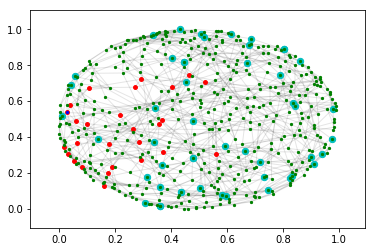

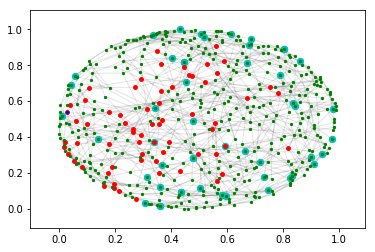

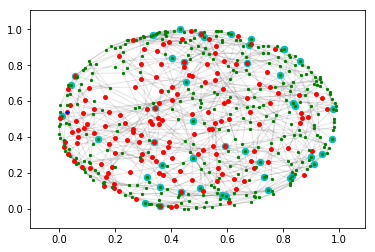

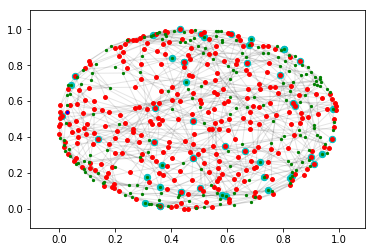

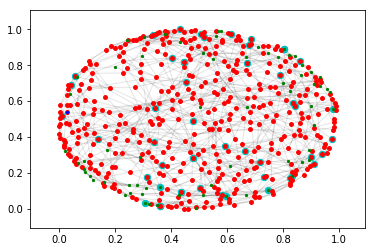

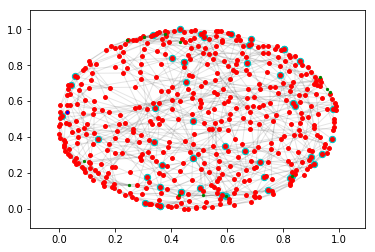

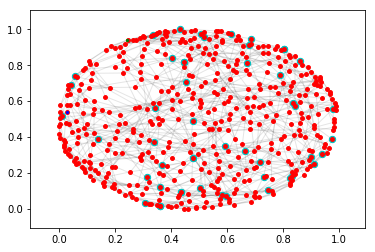

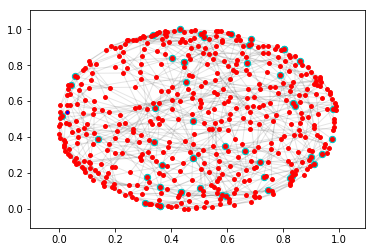

In [20]:
print("Starting infection")
infections = [[] for n in range(numRumors)]


j = 0
infected = getInfectedList(Graph,numRumors)

while(len(infected)<len(Graph.nodes())):
    
#for j in range(5):
    #print("====================================================\n\n\n\n\n\n\n\n====================================================")

    #for i in Graph.nodes():
     #   if i in monitorsList:
      #      print("Node ",str(i),"\t",Graph.node[i])

    Graph = infectionForward(Graph, propagProba, numRumors)
    
    # j+1 because j=0 is step 1
    monitorTrigger = updateMonitorTrig(j+1,monitorTrigger,monitorsList,Graph,numRumors)

    #print(monitorTrigger)
    #printMonitorTrig(monitorTrigger)

    fig2 = drawColoredGraph(Graph, Pos, numRumors, rumorSources, monitorsList)

    j += 1
    infected = getInfectedList(Graph,numRumors)

In [21]:
def findSet(myG,mySourceNode,myRadius):
    possible_set = list()
    curSet = findNeighDegN(myG,mySourceNode,myRadius)

    return  curSet

sets = list()
for i in range(len(monitorTrigger)):
    set1 =findSet(Graph,monitorTrigger[i][0],monitorTrigger[i][2])
    sets.append(set(set1))
    
print(set.intersection(*sets))

{174}


In [22]:
print(monitorTrigger)
print(rumorSources)

[(6, 1, 7), (14, 1, 7), (21, 1, 5), (40, 1, 8), (49, 1, 6), (52, 1, 7), (59, 1, 6), (62, 1, 7), (67, 1, 7), (73, 1, 7), (79, 1, 6), (92, 1, 7), (98, 1, 8), (99, 1, 7), (129, 1, 6), (136, 1, 7), (137, 1, 8), (147, 1, 7), (161, 1, 6), (163, 1, 6), (203, 1, 5), (205, 1, 6), (215, 1, 7), (222, 1, 6), (231, 1, 6), (250, 1, 5), (270, 1, 5), (274, 1, 5), (278, 1, 7), (297, 1, 9), (312, 1, 6), (318, 1, 4), (321, 1, 4), (334, 1, 6), (386, 1, 5), (395, 1, 7), (409, 1, 7), (419, 1, 7), (432, 1, 6), (436, 1, 6), (443, 1, 8), (445, 1, 9), (448, 1, 8), (479, 1, 5), (482, 1, 6), (486, 1, 6)]
[174]


[36]